# SMOTE + ENN và SMOTE + Tomek Links

Kết hợp sử dụng SMOTE và ENN hoặc ENN và Tomek Links để khuếch đại lớp thiểu số và loại các quan sát nhiễu có thể tạo ra.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs, make_classification

from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

## Tạo dữ liệu

In [2]:
def make_data(sep):
    
    # trả về mảng
    X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.99],
                           class_sep=sep,# các lớp được phân tách thế nào
                           random_state=1)
    
    # biến đổi mảng thành pandas df và series
    X = pd.DataFrame(X, columns =['VarA', 'VarB'])
    y = pd.Series(y)
    
    return X, y

X, y = make_data(sep=2)

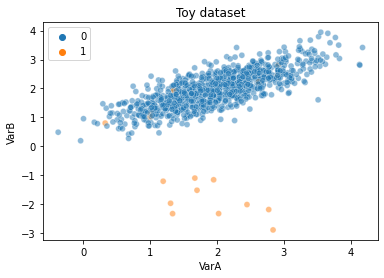

In [3]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

## SMOTEENN và SMOTETomek

- [SMOTEENN](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html)
- [SMOTETomek](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTETomek.html)

In [5]:
## Yêu cầu 1:
## VIẾT CODE Ở ĐÂY:
sm = SMOTE(
    sampling_strategy='auto',  # chỉ lấy mẫu lớp thiểu số
    random_state=0,  # khả năng tái lặp
    k_neighbors=5,
    n_jobs=4
)

X_sm, y_sm = sm.fit_resample(X, y)

<details><summary> Gợi ý </summary>

[SMOTE()](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)

</details>

In [6]:
## Yêu cầu 2:
## VIẾT CODE Ở ĐÂY:

# cần ENN làm đối số của SMOTEENN
enn = EditedNearestNeighbours(
    sampling_strategy='auto',
    n_neighbors=3,
    kind_sel='all',
    n_jobs=4)


smenn = SMOTEENN(
    sampling_strategy='auto',  # chỉ lấy mẫu lớp thiểu số
    random_state=0,  # khả năng tái lặp
    smote=sm,
    enn=enn,
    n_jobs=4
)

X_smenn, y_smenn = smenn.fit_resample(X, y)

<details><summary> Gợi ý </summary>

[SMOTEENN()](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html)

</details>

In [7]:
## Yêu cầu 3:
## VIẾT CODE Ở ĐÂY:

# cần tomek làm đối số của SMOTETomek
tl = TomekLinks(
    sampling_strategy='all',
    n_jobs=4)

smtomek = SMOTETomek(
    sampling_strategy='auto',  # chỉ lấy mẫu lớp thiểu số
    random_state=0,  # khả năng tái lặp
    smote=sm,
    tomek=tl,
    n_jobs=4
)

X_smtl, y_smtl = smtomek.fit_resample(X, y)

<details><summary> Gợi ý </summary>

[SMOTETomek()](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTETomek.html)

</details>

In [8]:
# kích thước của các tập dữ liệu oversampled

X_sm.shape, X_smenn.shape, X_smtl.shape

((1966, 2), (1735, 2), (1834, 2))

In [9]:
# số lượng quan sát của lớp thiểu số

y.value_counts(), y_sm.value_counts(), y_smenn.value_counts(), y_smtl.value_counts()

(0    983
 1     17
 dtype: int64,
 0    983
 1    983
 dtype: int64,
 0    983
 1    752
 dtype: int64,
 0    917
 1    917
 dtype: int64)

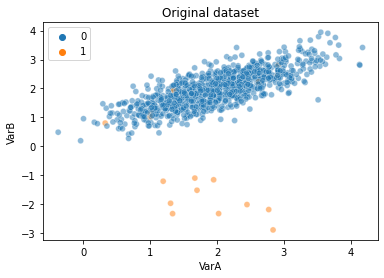

In [10]:
# biểu đồ dữ liệu ban đầu

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

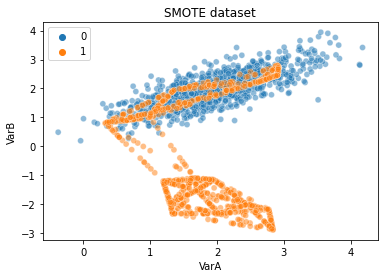

In [11]:
# biểu đồ dữ liệu đã tạo
## Yêu cầu 4:
## VIẾT CODE Ở ĐÂY:
sns.scatterplot(
    data=X_sm, x="VarA", y="VarB", hue=y_sm, alpha=0.5
)

plt.title('SMOTE dataset')
plt.show()

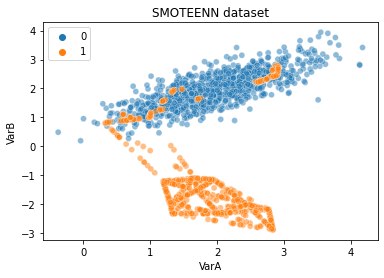

In [12]:
## Yêu cầu 5:
## VIẾT CODE Ở ĐÂY:
sns.scatterplot(
    data=X_smenn, x="VarA", y="VarB", hue=y_smenn, alpha=0.5
)

plt.title('SMOTEENN dataset')
plt.show()

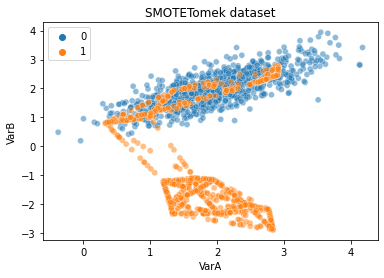

In [13]:
## Yêu cầu 6:
## VIẾT CODE Ở ĐÂY:
sns.scatterplot(
    data=X_smtl, x="VarA", y="VarB", hue=y_smtl, alpha=0.5
)

plt.title('SMOTETomek dataset')
plt.show()

Chúng ta thấy rằng các lớp không được phân tách rõ ràng; tổ hợp Oversampling và Undersampling có thể giúp loại các mẫu bị nhiễu do SMOTE tạo ra.

**BÀI TẬP**

- Kiểm tra SMOTE + ENN hoặc Tomek Links trong một tập dữ liệu từ imbalanced-learn và tạo một số biểu đồ của các biến làm nổi bật lớp thiểu số, để hiển thị kết quả tốt hơn.

- Thay đổi phân tách của các lớp trong hàm tạo dữ liệu ở notebook này và khám phá cách các phương pháp tạo các phân phối khác nhau của lớp thiểu số.

Text(0.5, 1.0, 'SMOTETomek dataset')

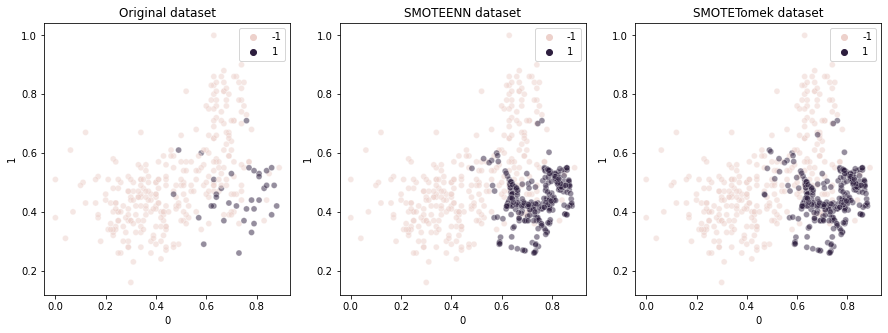

In [14]:
# Kiểm tra SMOTE + ENN hoặc Tomek Links trong một tập dữ liệu từ imbalanced-learn 
# và tạo một số biểu đồ của các biến làm nổi bật lớp thiểu số, để hiển thị kết quả tốt hơn.

from imblearn.datasets import fetch_datasets

dataset_name = 'ecoli'
data = fetch_datasets()[dataset_name]
X = data.data
y = data.target

X = pd.DataFrame(X)
y = pd.Series(y)

sm = SMOTE(
    sampling_strategy='auto',  # chỉ lấy mẫu lớp thiểu số
    random_state=0,  # khả năng tái lặp
    k_neighbors=5,
    n_jobs=None
)
enn = EditedNearestNeighbours(
    sampling_strategy='auto',
    n_neighbors=3,
    kind_sel='all',
    n_jobs=None)

smenn = SMOTEENN(
    sampling_strategy='auto',  # chỉ lấy mẫu lớp thiểu số
    random_state=0,  # khả năng tái lặp
    smote=sm,
    enn=enn,
    n_jobs=None
)

X_smenn, y_smenn = smenn.fit_resample(X, y)

tl = TomekLinks(
    sampling_strategy='all',
    n_jobs=None)

smtomek = SMOTETomek(
    sampling_strategy='auto',  # chỉ lấy mẫu lớp thiểu số
    random_state=0,  # khả năng tái lặp
    smote=sm,
    tomek=tl,
    n_jobs=None
)

X_smtl, y_smtl = smtomek.fit_resample(X, y)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax0 = sns.scatterplot(data=X, x=0, y=1, hue=y, ax=ax[0], alpha=0.5)
ax0.set_title('Original dataset')
ax1 = sns.scatterplot(data=X_smenn, x=0, y=1, hue=y_smenn, ax=ax[1], alpha=0.5)
ax1.set_title('SMOTEENN dataset')
ax2 = sns.scatterplot(data=X_smtl, x=0, y=1, hue=y_smtl, ax=ax[2], alpha=0.5)
ax2.set_title('SMOTETomek dataset')


Text(0.5, 1.0, 'SMOTETomek dataset')

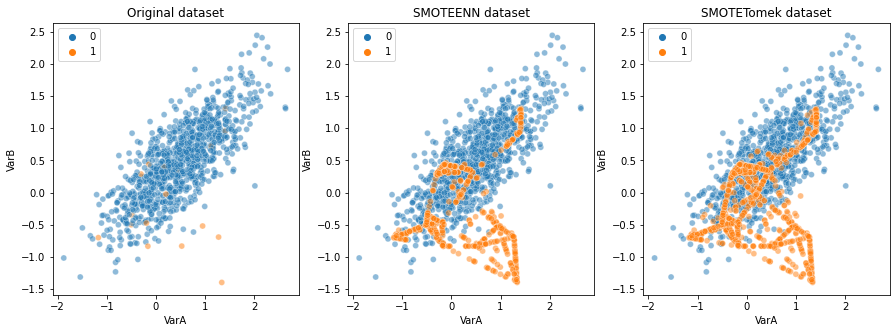

In [16]:
# Thay đổi phân tách của các lớp trong hàm tạo dữ liệu ở notebook này và 
# khám phá cách các phương pháp tạo các phân phối khác nhau của lớp thiểu số.
X, y = make_data(sep=0.5)
sm = SMOTE(
    sampling_strategy='auto',  # chỉ lấy mẫu lớp thiểu số
    random_state=0,  # khả năng tái lặp
    k_neighbors=5,
    n_jobs=None
)
enn = EditedNearestNeighbours(
    sampling_strategy='auto',
    n_neighbors=3,
    kind_sel='all',
    n_jobs=None)

smenn = SMOTEENN(
    sampling_strategy='auto',  # chỉ lấy mẫu lớp thiểu số
    random_state=0,  # khả năng tái lặp
    smote=sm,
    enn=enn,
    n_jobs=None
)

X_smenn, y_smenn = smenn.fit_resample(X, y)

tl = TomekLinks(
    sampling_strategy='all',
    n_jobs=None)

smtomek = SMOTETomek(
    sampling_strategy='auto',  # chỉ lấy mẫu lớp thiểu số
    random_state=0,  # khả năng tái lặp
    smote=sm,
    tomek=tl,
    n_jobs=None
)

X_smtl, y_smtl = smtomek.fit_resample(X, y)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax0 = sns.scatterplot(data=X, x='VarA', y='VarB', hue=y, ax=ax[0], alpha=0.5)
ax0.set_title('Original dataset')
ax1 = sns.scatterplot(data=X_smenn, x='VarA', y='VarB', hue=y_smenn, ax=ax[1], alpha=0.5)
ax1.set_title('SMOTEENN dataset')
ax2 = sns.scatterplot(data=X_smtl, x='VarA', y='VarB', hue=y_smtl, ax=ax[2], alpha=0.5)
ax2.set_title('SMOTETomek dataset')

